## Parameter search visualizations

This notebook contains simple visualizations of data collected with glitching
script to determine good parameters for Chipwhisperer glitches. 

As of now, only clock glitching is considered as it is proves most effective.

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("data/param-search/husky/001/results-[10, -10, 10]-attack2-x1-husky.csv", header=0)
sns.set(style="ticks")
df = df.sort_values(by=["good/bad/crash"], ascending=False)

df

,scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,scope.glitch.ext_offset,good/bad/crash,public
0,316,561,1,237,good,0.0
6624,397,1975,11,590,good,0.0
6617,465,525,1,66,good,0.0
6618,363,1204,4,106,good,0.0
6619,1287,579,3,323,good,0.0
...,...,...,...,...,...,...
6738,153,1392,4,360,bad,9.0
5835,118,2,12,547,bad,264.0
4585,1032,1244,1,542,bad,417.0
1306,1877,2039,10,366,bad,404.0


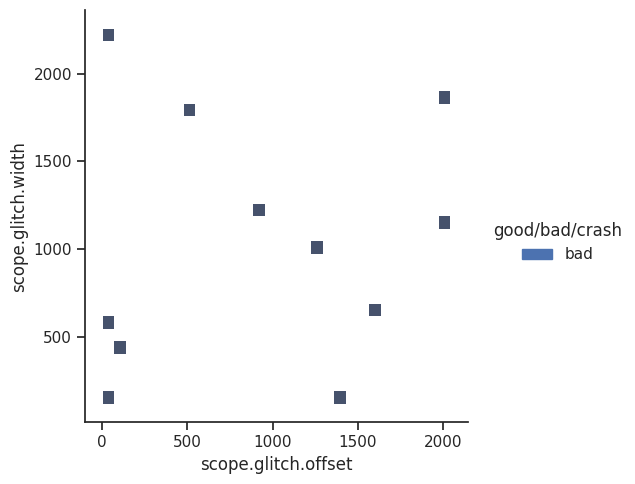

In [4]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.offset", y="scope.glitch.width", hue='good/bad/crash', bins=30)

<Axes: xlabel='scope.glitch.offset', ylabel='scope.glitch.width'>

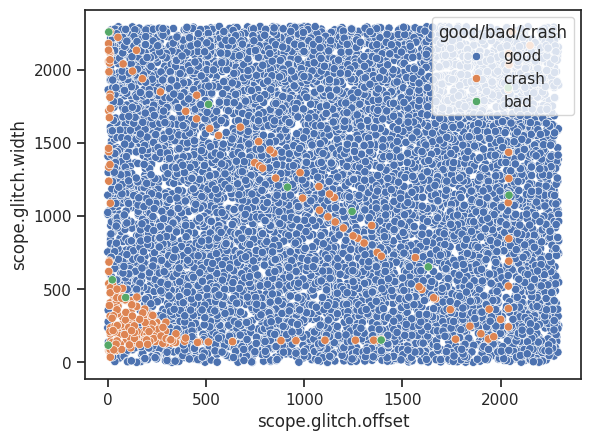

In [5]:
sns.scatterplot(data=df, x="scope.glitch.offset", y="scope.glitch.width", hue='good/bad/crash')

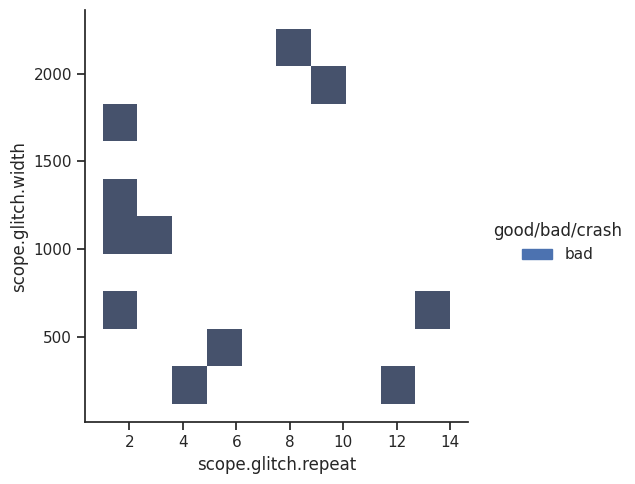

In [6]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.repeat", y="scope.glitch.width", hue='good/bad/crash', bins=10)

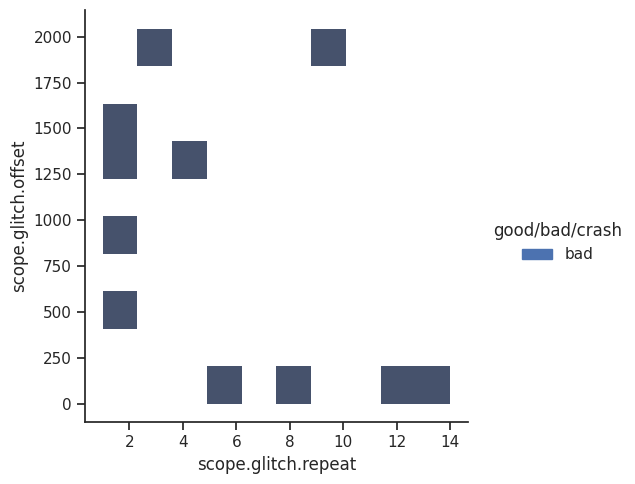

In [7]:
sns.displot(data=df[df["good/bad/crash"] == "bad"], x="scope.glitch.repeat", y="scope.glitch.offset", hue='good/bad/crash', bins=10)

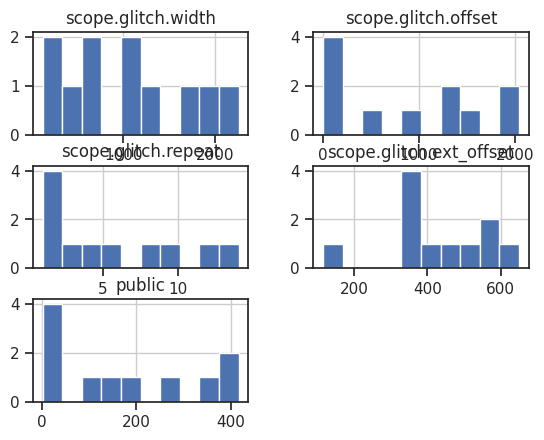

In [8]:
p = df[df["good/bad/crash"] == "bad"].hist(bins=10)

<Axes: xlabel='scope.glitch.width', ylabel='Count'>

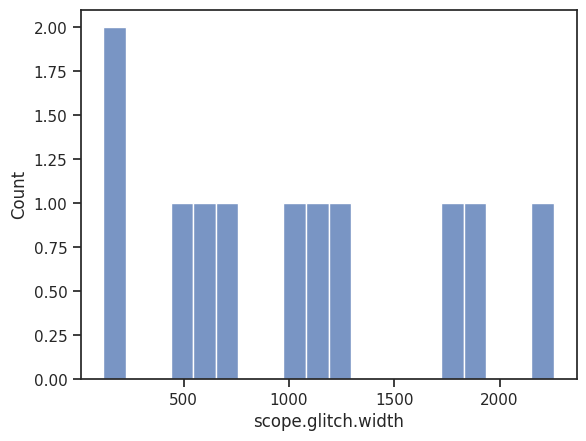

In [9]:
sns.histplot(data=df[df["good/bad/crash"]=="bad"], x="scope.glitch.width", bins=20)

## Top 15 according to number of successful glitches

In [10]:
grouped_df = df
grouped_df["scope.glitch.width"] = round(grouped_df["scope.glitch.width"])
grouped_df["scope.glitch.offset"] = round(grouped_df["scope.glitch.offset"])
grouped_df = grouped_df[grouped_df["good/bad/crash"] == "bad"].drop(["scope.glitch.ext_offset"], axis=1).groupby(["scope.glitch.width", "scope.glitch.offset"]).count()

In [11]:
grouped_df

,,scope.glitch.repeat,good/bad/crash,public
scope.glitch.width,scope.glitch.offset,,,
118,2,1,1,1
153,1392,1,1,1
444,91,1,1,1
565,23,1,1,1
653,1632,1,1,1
1032,1244,1,1,1
1143,2043,1,1,1
1198,915,1,1,1
1764,513,1,1,1


In [12]:
top15 = grouped_df.sort_values(["good/bad/crash"], ascending=False).head(15)

In [13]:


grouped_df = df
grouped_df["scope.glitch.width"] = round(grouped_df["scope.glitch.width"])
grouped_df["scope.glitch.offset"] = round(grouped_df["scope.glitch.offset"])
grouped_df = grouped_df[grouped_df["good/bad/crash"] == "bad"].drop(["scope.glitch.ext_offset"], axis=1).groupby(["scope.glitch.width", "scope.glitch.offset", "scope.glitch.repeat"]).count()


In [14]:
grouped_df.sort_values(["good/bad/crash"], ascending=False).head(15)

,,,good/bad/crash,public
scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,,
118,2,12,1,1
153,1392,4,1,1
444,91,6,1,1
565,23,14,1,1
653,1632,2,1,1
1032,1244,1,1,1
1143,2043,3,1,1
1198,915,1,1,1
1764,513,2,1,1


# 